## Airline Passenger Satisfaction

## About Dataset

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

This represents a binary classification problem.

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Import dataset (both train and test)

In [2]:
dt_train = pd.read_csv('train.csv')
dt_test = pd.read_csv('test.csv')

In [3]:
#have a look at the train dataset
dt_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
#have a look at the columns of the train dataset
dt_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
# It can be useful for data presentation and processing to bin the age of both dataset together

# 1. binning the passengers age (train)

dt_train.loc[(dt_train.Age <= 18), 'AgeGroup'] = 'Kid/Teenager'
dt_train.loc[((dt_train.Age > 18) & (dt_train.Age <= 35 )), 'AgeGroup'] = 'Young Adult'
dt_train.loc[((dt_train.Age > 35) & (dt_train.Age <= 45 )), 'AgeGroup'] = 'Adult'
dt_train.loc[((dt_train.Age > 45) & (dt_train.Age <= 60 )), 'AgeGroup'] = 'Senior'
dt_train.loc[(dt_train.Age > 60), 'AgeGroup'] = 'Old'

In [6]:
# 2. binning the passengers age (test)

dt_test.loc[(dt_test.Age <= 18), 'AgeGroup'] = 'Kid/Teenager'
dt_test.loc[((dt_test.Age > 18) & (dt_test.Age <= 35 )), 'AgeGroup'] = 'Young Adult'
dt_test.loc[((dt_test.Age > 35) & (dt_test.Age <= 45 )), 'AgeGroup'] = 'Adult'
dt_test.loc[((dt_test.Age > 45) & (dt_test.Age <= 60 )), 'AgeGroup'] = 'Senior'
dt_test.loc[(dt_test.Age > 60), 'AgeGroup'] = 'Old'

In [7]:
# two columns are not useful for the aim of the dataset
# dropping two columns(train and test): Unnamed: 0 and id

dt_train = dt_train.drop(columns=['Unnamed: 0','id'])
dt_test = dt_test.drop(columns=['Unnamed: 0','id'])

In [8]:
# repositioning the AgeGroup column (train)

age_column = dt_train.pop('AgeGroup')

dt_train.insert(2, 'AgeGroup', age_column)



In [9]:
#Let's see if the dataset as been updated with the changes done above
dt_train

,Gender,Customer Type,AgeGroup,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,Kid/Teenager,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,Young Adult,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,Young Adult,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,Young Adult,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,Old,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Young Adult,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,Senior,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,Young Adult,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,Young Adult,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

AgeGroup: The actual age category of the passengers (Kid/teenager,Adult,Senior)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Dataset exploration

In [10]:
dt_train.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [11]:
#convert satisfaction to numeircal to be able to compute percentages:
#0=neutral or dissatisfied, 1=satisfied
dt_train["satisfaction"]=[1 if record=="satisfied" else 0 for record in dt_train.satisfaction]

dt_train.satisfaction.head() #ok

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [12]:
# Gender vs satisfaction
dt_train[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.439475
0,Female,0.427371


satisfaction-percentage is similar between men & women, around 43%

In [13]:
# Age vs satisfaction
dt_train[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
34,41,0.607899
39,46,0.599819
44,51,0.597249
50,57,0.590102
45,52,0.586207
...,...,...
2,9,0.137283
63,70,0.136143
3,10,0.131772
1,8,0.107813


In [14]:
# Type_of_Travel vs satisfaction
dt_train[["Type of Travel","satisfaction"]].groupby(["Type of Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type of Travel,satisfaction
0,Business travel,0.582597
1,Personal Travel,0.101678


58% of passengers on business travels are satisfied while only 10% of passengers on personal travels are satisfied.

In [15]:
# Customer_Type vs satisfaction
dt_train[["Customer Type","satisfaction"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer Type,satisfaction
0,Loyal Customer,0.477291
1,disloyal Customer,0.236658


In [16]:
# Class vs satisfaction
dt_train[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.694251
2,Eco Plus,0.246064
1,Eco,0.186138


In [17]:
#Ratings of travellers on the services/characteristics of the flight
##Representing categotical variables

def bar_plot(variable):
    
    var=dt_train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values) #elements of counts()
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    #print("{}: \n {}".format(variable,var_Value))

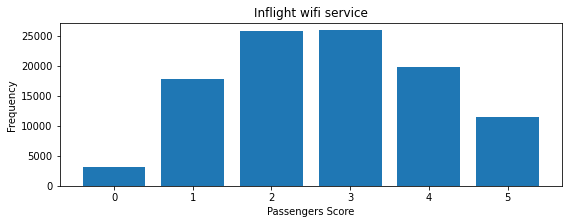

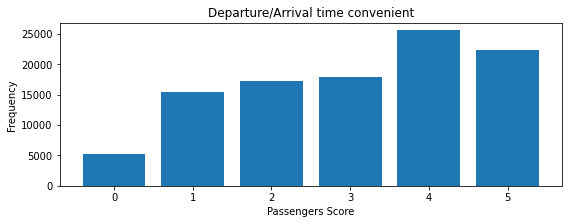

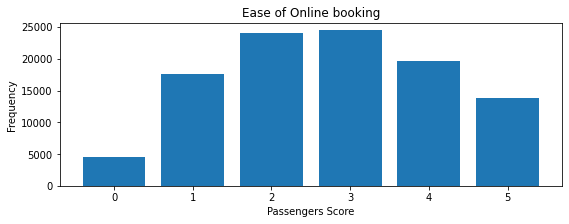

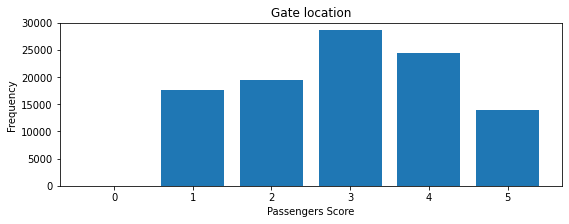

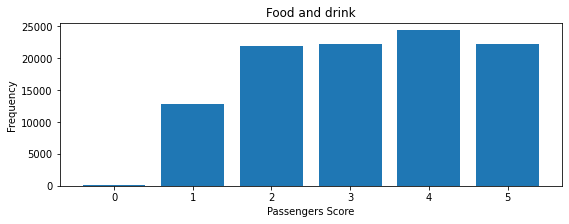

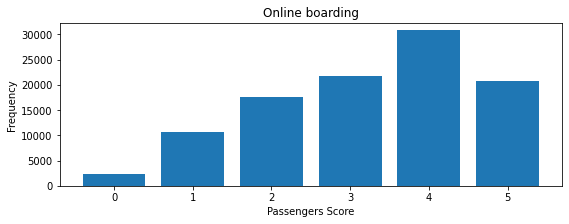

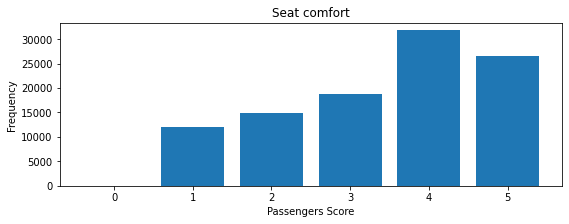

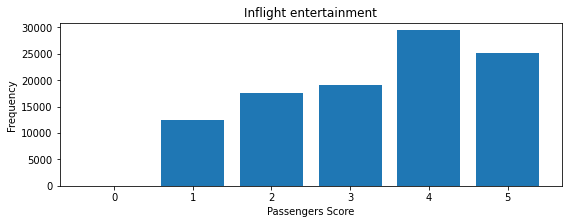

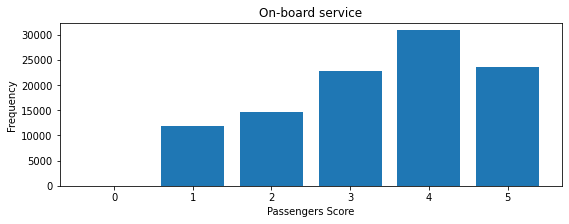

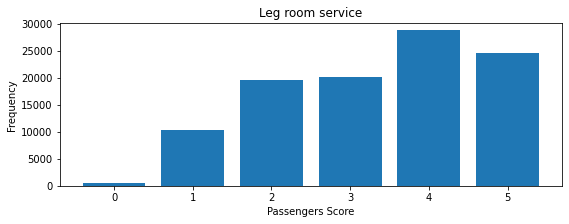

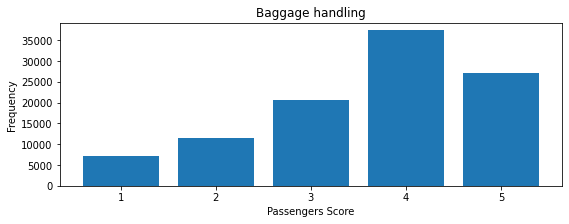

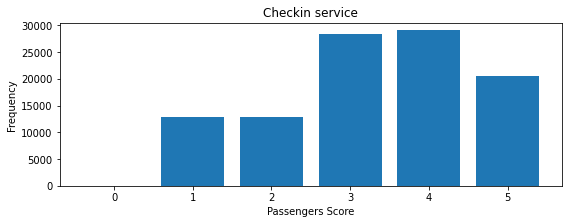

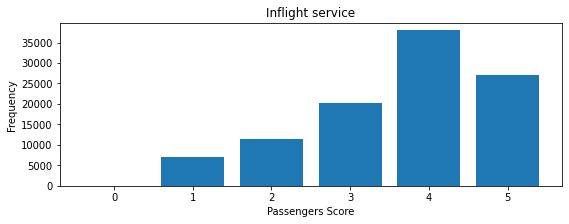

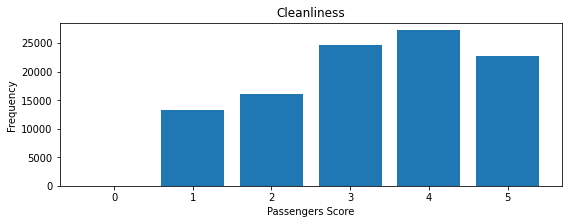

In [18]:
services=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", 
          "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", 
          "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]
for c in services:
    bar_plot(c)

In [19]:
##Representing numerical variables, n of bins automatically decided (Sturges method)

def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(dt_train[variable],bins='sturges', align='mid')
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

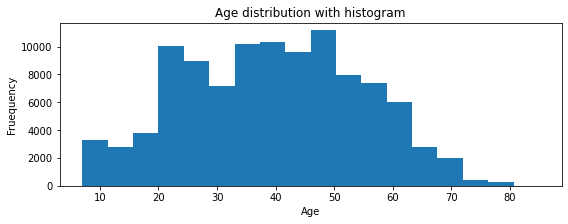

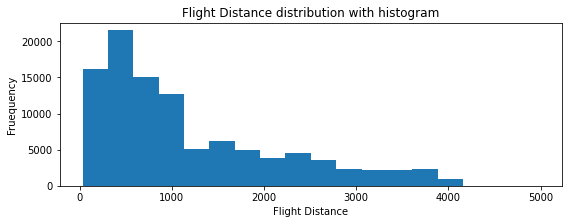

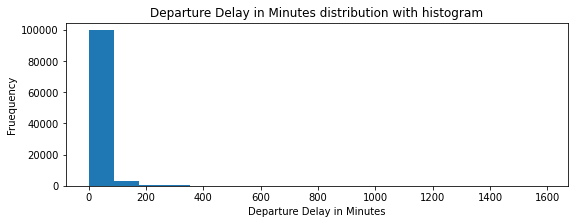

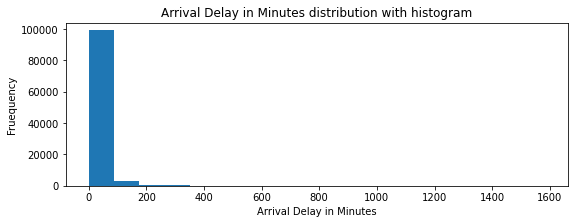

In [20]:
numericVar=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numericVar:
    plot_hist(n)

EXCURSUS: GENDER ANALYSIS

1)

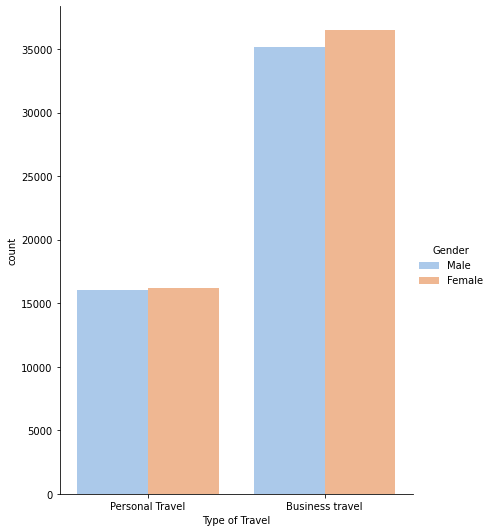

In [21]:
sb.catplot(data=dt_train, x="Type of Travel", hue="Gender", kind="count",
           palette=sb.color_palette("pastel"),height=7.5, aspect=.8)

Insights:
- the number of Personal Travel & Business Travel tends to be the same for Men & Women. <br>
Women perform Business Travels as much as men

2)

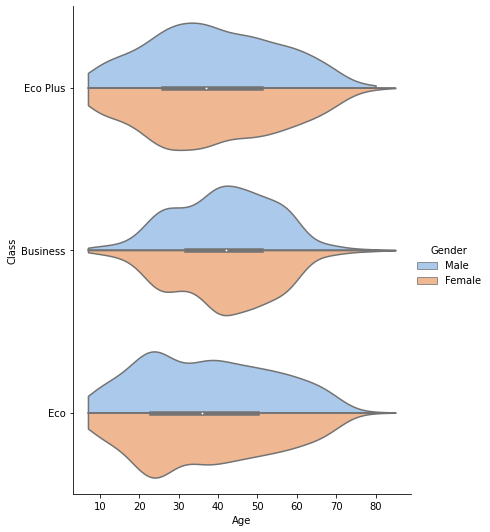

In [22]:
sb.catplot(
    data=dt_train, x="Age", y="Class", hue="Gender",
    kind="violin", bw=.25, cut=0, split=True,
    palette=sb.color_palette("pastel"),height=7.5, aspect=.8)

In [23]:
dMale = dt_train[dt_train['Gender'] == 'Male']
dMale['Class'].value_counts()

Business    24738
Eco         22887
Eco Plus     3552
Name: Class, dtype: int64

In [24]:
dMale = dt_train[dt_train['Gender'] == 'Female']
dMale['Class'].value_counts()

Business    24927
Eco         23858
Eco Plus     3942
Name: Class, dtype: int64

Insights:
- In each class, highly symmetrical gender distribution: men & women of the same age tend to travel in the same class
- The age of passengers in the business class tends to be higher

3)

In [25]:
#convert satisfaction back to categorical for the graphs:
dt_train.satisfaction.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [26]:
#0=neutral or dissatisfied, 1=satisfied
dt_train["satisfaction"]=["satisfied" if record==1 else "neutral or dissatisfied" for record in dt_train.satisfaction]

dt_train.satisfaction.head() #ok

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

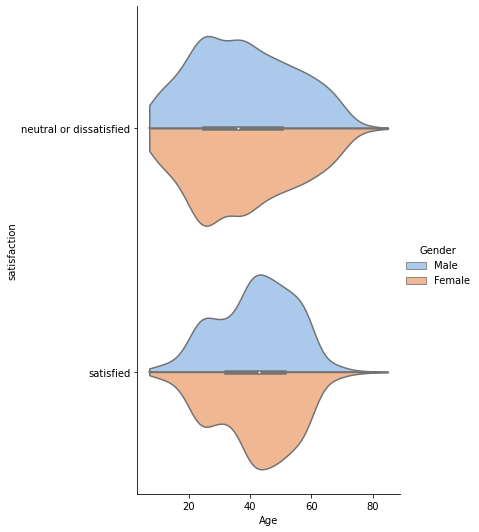

In [27]:
sb.catplot(
    data=dt_train, x="Age", y="satisfaction", hue="Gender",
    kind="violin", bw=.25, cut=0, split=True,
    #palette=sns.color_palette(['green', 'blue'])) #NB to specify the col!
    palette=sb.color_palette("pastel"),height=7.5, aspect=.8)

Insights:
- Symmetrical gender distribution between satisfied - neutral/dissatisfied people
- The age of satisfied people tends to be higher

TYPE OF TRAVEL - CLASS - FLIGHT DISTANCE

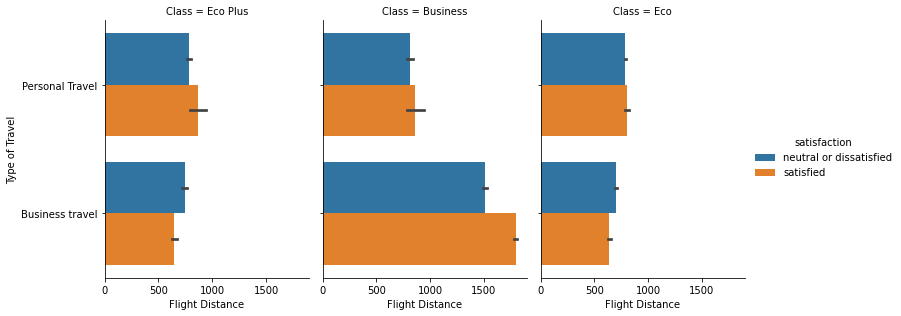

In [28]:
sb.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", 
            col="Class", data=dt_train, kind="bar", height=4.5, aspect=.8)

Insights:
- Business Travels have the highest flight distance and tend to be covered in Business class
- For Personal Travels there is not such a preference for a specific class, passengers are distributed fairly evenly between classes
- In Eco Plus class, Business travellers are more neutral-dissatisfied than satisfied, while Personal travellers are more satisfied than neutral-dissatisfied

## EDA (graphs)

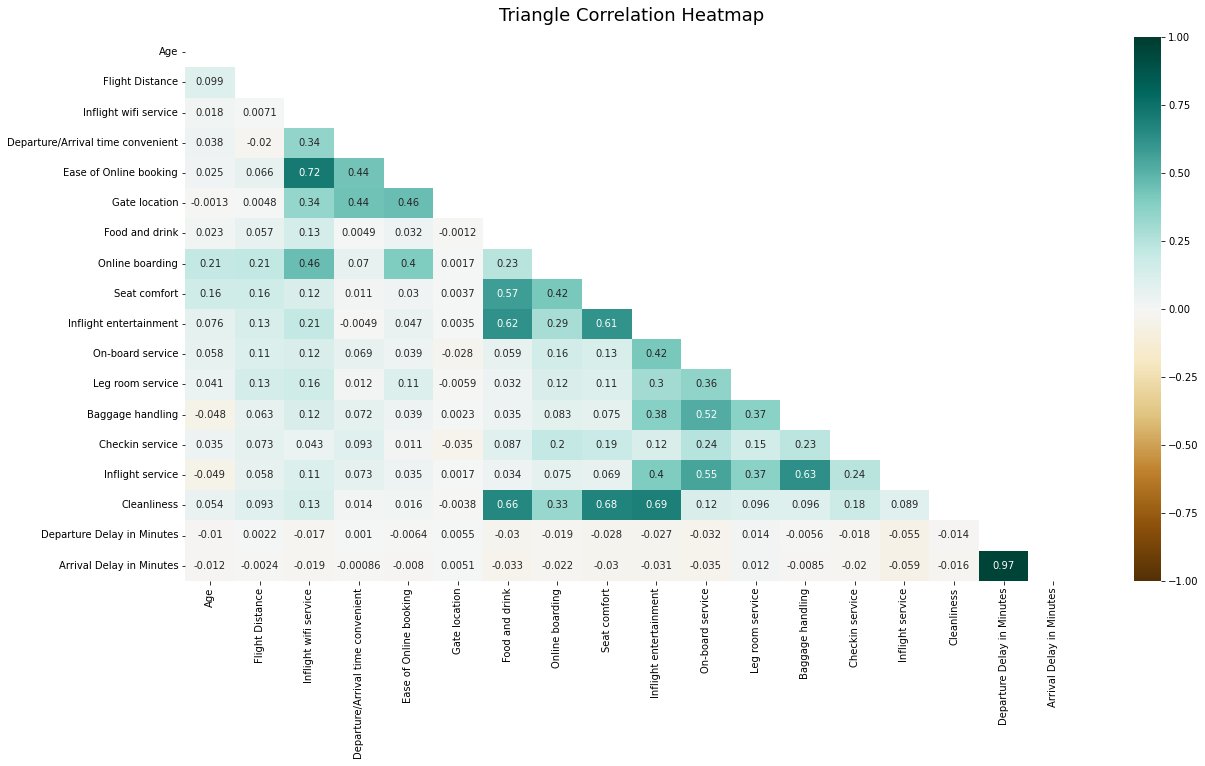

In [29]:
#Correlation matrix
##note on the correlation matrix: it must be done only if all the columns are numerical because categorical variables will not be considered
###SO, in this case we will have a look at the correlation matrix to have an idea, but the correlation must be done also after the encoding

# Display only one half of the heat map because the other half is a reflection so it is just confusing 
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(dt_train.corr(), dtype=np.bool))
heatmap = sb.heatmap(dt_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

Inflight wifi service is highly correlated with ease of online booking (correlation of 72%).

There is a 97% correlation between Departure Delay in Minutes with Arrival Delay in Minutes. This does make sense because Arrival dalay is, in most of the cases a consequence of Departure delay.

Cleanliness, Food and Drink, Seat confort and Inflight entertainment are correlated between each other. 

In [30]:
#See totally (numbers and %) how many passengers are satisfied and how many are not in the train dataset 
print(dt_train.satisfaction.value_counts())

fig = px.pie(dt_train, values=dt_train.satisfaction.value_counts(), names=["Neutral or dissatisfied", "Satisfied"])
fig.update_layout(title_text='Satisfaction Percentage', title_x=0.5)


neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [31]:
#See totally (numbers and %) how many passengers are satisied and how many are not in the test dataset
print(dt_test.satisfaction.value_counts())

fig = px.pie(dt_test, values = dt_test.satisfaction.value_counts(), names=["Neutral or dissatisfied", "Satisfied"])
fig.update_layout(title_text='Satisfaction Percentage', title_x=0.5)

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64


The train set is overall balanced

### Number of passengers that travel for personal or work reason that have expressed satisfaction/dissatisfaction

<AxesSubplot:xlabel='Type of Travel'>

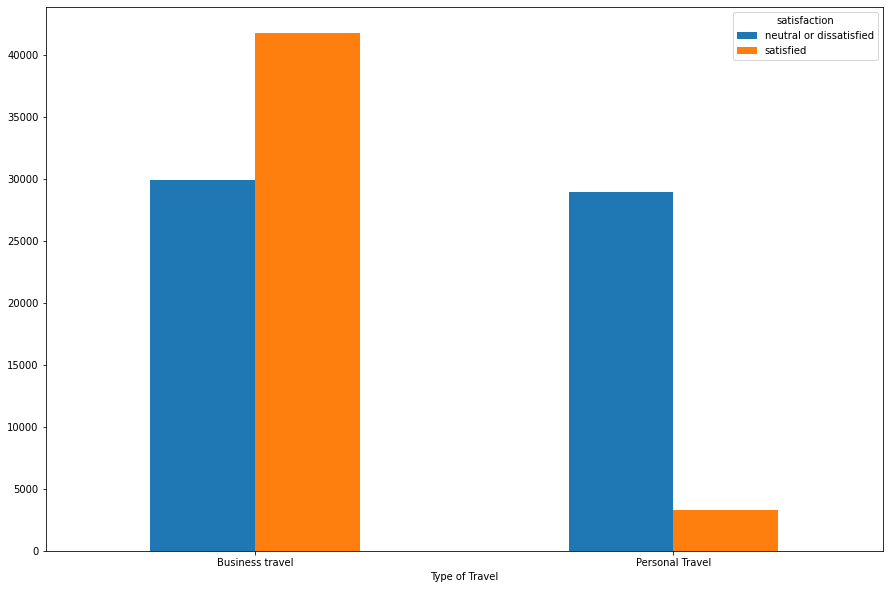

In [32]:
pd.crosstab(dt_train['Type of Travel'],dt_train['satisfaction']).plot.bar(figsize=(15,10),rot = 0)

### Number of people divided by age that expressed satisfaction or dissatisfaction

<AxesSubplot:xlabel='Age'>

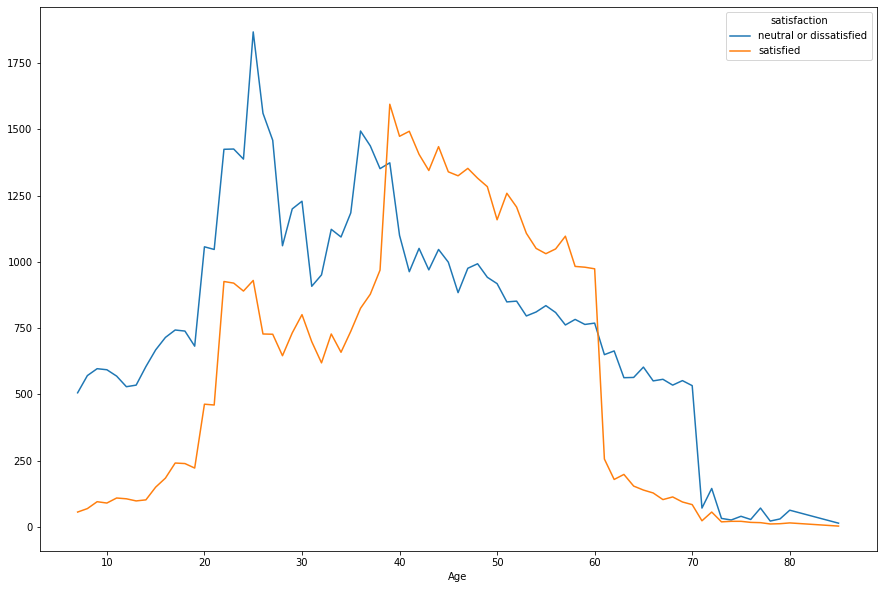

In [33]:
pd.crosstab(dt_train['Age'],dt_train['satisfaction']).plot.line(figsize=(15,10),rot = 0)

### Number of people divided by age and class of travel


<AxesSubplot:xlabel='AgeGroup'>

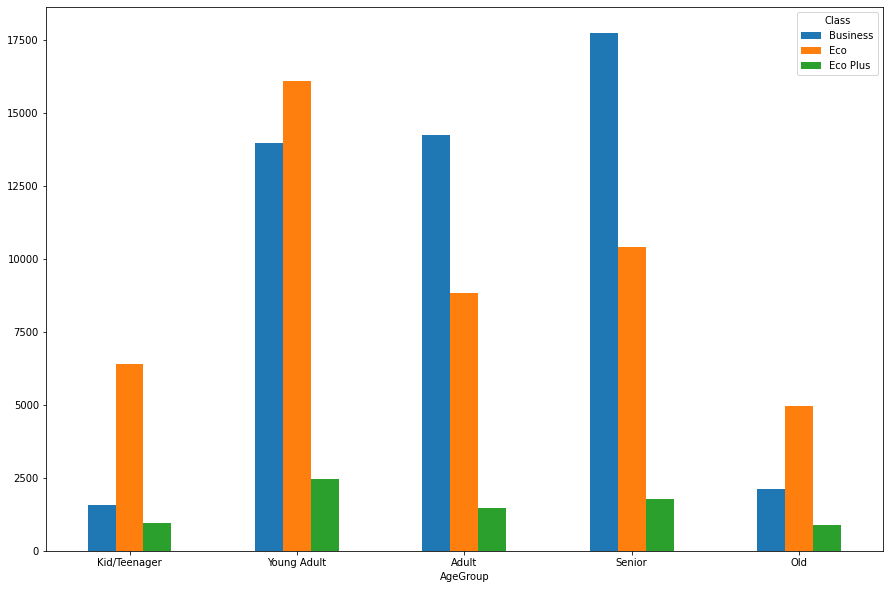

In [34]:
generations = ['Kid/Teenager','Young Adult','Adult','Senior','Old']

pd.crosstab(dt_train['AgeGroup'],dt_train['Class']).reindex(generations).plot.bar(figsize=(15,10),rot = 0)

### Level of satisfaction expressed by loyal costumers and disloyal costumers


<AxesSubplot:xlabel='Customer Type'>

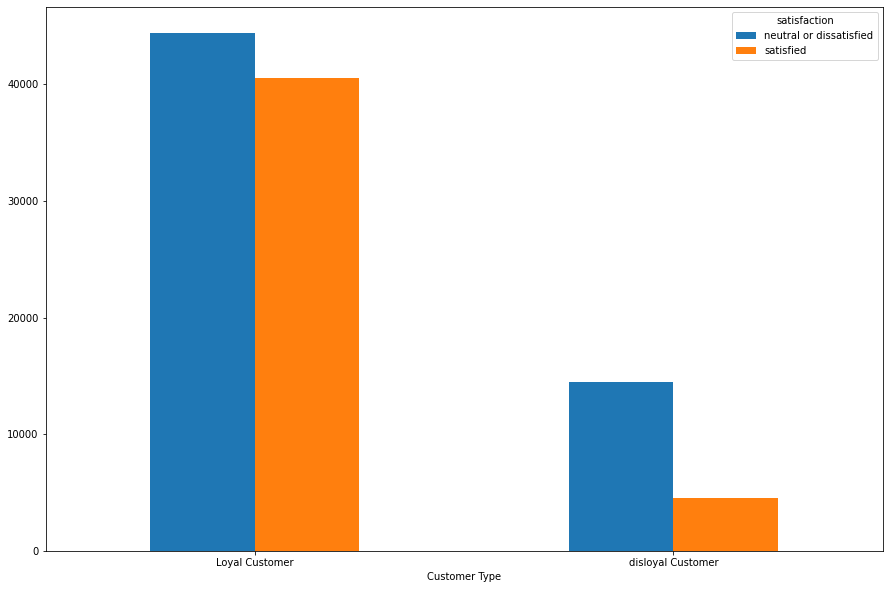

In [35]:
pd.crosstab(dt_train['Customer Type'],dt_train['satisfaction']).plot.bar(figsize=(15,10),rot = 0)

### Number of people that expressed their satisfaction/dissatisfaction divided by the level of comfort (from 1 to 5) of the seat


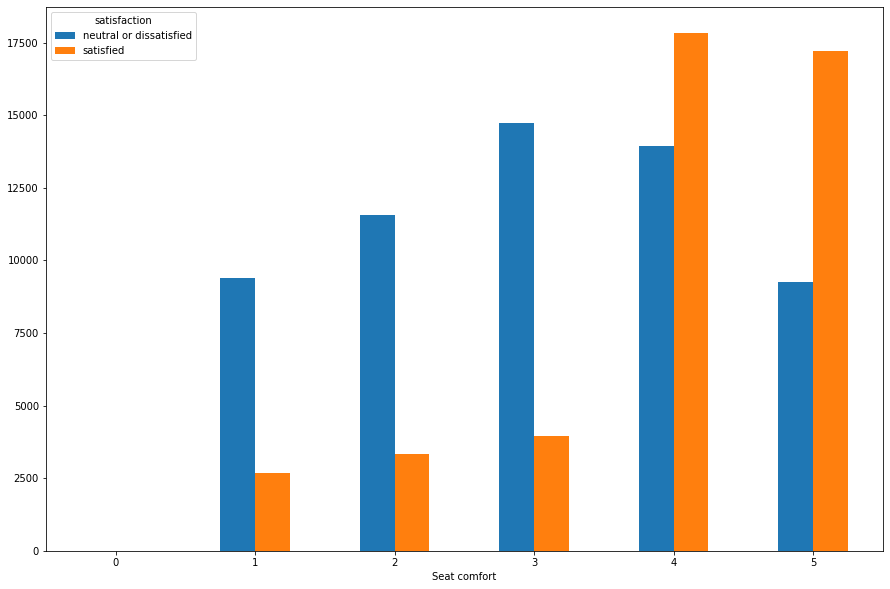

In [36]:
pd.crosstab(dt_train['Seat comfort'],dt_train['satisfaction']).plot.bar(figsize=(15,10),rot = 0);

Very few people that expressed dissatisfaction have a low seat comfort (1-2), on the other hand, a lot of people that expressed satisfaction have given a high mark to seat confort (4-5).

### Number of people that expressed satisfaction/dissatisfaction by travel class

<AxesSubplot:xlabel='Class'>

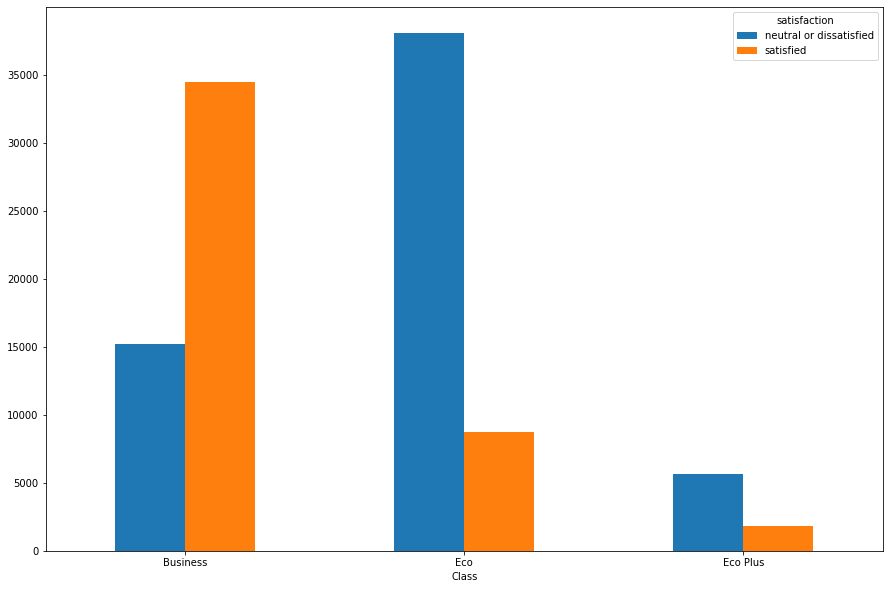

In [37]:
pd.crosstab(dt_train['Class'],dt_train['satisfaction']).plot.bar(figsize=(15,10),rot = 0)

### Number of people that expressed satisfaction/dissatisfaction by Flight Distance

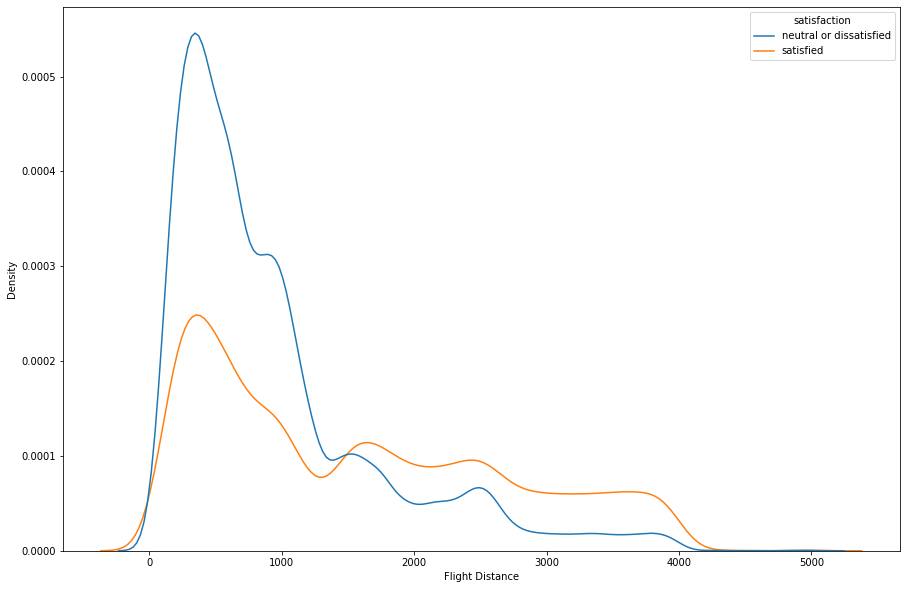

In [38]:
plt.figure(figsize=(15,10))
sb.kdeplot(data=dt_train, x="Flight Distance", hue="satisfaction")
plt.show()

Most of the people in this survey have travelled for a shorter distance. The higher dissatisfaction is in shorter flights, with the increase of flight distance there is an increase of satisfied people and a decrease of dissatisfied.

## Feature Engineering

Substituing 400 nan values with the mean

In [39]:
# dt_train.loc['nan']

dt_train.loc[np.isnan(dt_train["Arrival Delay in Minutes"])]

,Gender,Customer Type,AgeGroup,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,Adult,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,Senior,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,Adult,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,Young Adult,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,Young Adult,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,Senior,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,Senior,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,Young Adult,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,Senior,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [40]:
#substitute the nan value with the mean

dt_train["Arrival Delay in Minutes"] = dt_train["Arrival Delay in Minutes"].fillna(dt_train["Arrival Delay in Minutes"].mean())
dt_test["Arrival Delay in Minutes"] = dt_test["Arrival Delay in Minutes"].fillna(dt_test["Arrival Delay in Minutes"].mean())

In [41]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   AgeGroup                           103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [42]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

## Econding (train and test)

In [43]:
# splitting columns in categorical and numeric

num = ['Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
       'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
       'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service',
       'Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']
# target = ['satisfaction']
target = ['satisfaction']
cat = ['Gender','Customer Type','AgeGroup','Type of Travel','Class']

In [44]:
# train
# dividing the column in Categorical (cat), numerical (num), and target
tr_cat = dt_train[cat]
tr_num = dt_train[num]
tr_targ = dt_train[target]

tr_cat.shape,tr_num.shape,tr_targ.shape

((103904, 5), (103904, 17), (103904, 1))

In [45]:
# test

te_cat = dt_test[cat]
te_num = dt_test[num]
te_targ = dt_test[target]

In [46]:
# categorical column encoding (train)

ohe_cat = OneHotEncoder(sparse=False,drop = 'if_binary')
tr_cat_en = ohe_cat.fit_transform(tr_cat.values)

# target column econding

ohe_targ = OneHotEncoder(sparse=False,drop = 'if_binary')
tr_targ_en = ohe_targ.fit_transform(tr_targ.to_numpy().reshape(-1, 1))


In [47]:
# categorical column encoding (test)

te_cat_en = ohe_cat.fit_transform(te_cat.values)

# target column econding

te_targ_en = ohe_targ.fit_transform(te_targ.to_numpy().reshape(-1, 1))

In [48]:
tr_targ_en,te_targ_en

(array([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]]),
 array([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]]))

1 - satisfied; 0 - neutral or dissatisfied;

In [49]:
# getting encoded column names

feature_names = num + ohe_cat.get_feature_names_out(cat).tolist()

print(feature_names)

['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 'Customer Type_disloyal Customer', 'AgeGroup_Adult', 'AgeGroup_Kid/Teenager', 'AgeGroup_Old', 'AgeGroup_Senior', 'AgeGroup_Young Adult', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


In [50]:
# encoded train dataset 

X_train = np.concatenate([tr_num, tr_cat_en],axis = 1)
X_test = np.concatenate([te_num, te_cat_en],axis = 1)

In [51]:
X_train.shape,X_test.shape

((103904, 28), (25976, 28))

## Scaling (train and test)

In [52]:
# find out about the different use of fit_transform and transform methods: why the first method is used only on the train set and the second method is used on the test set instead?

# fro more info ---> https://www.geeksforgeeks.org/what-is-the-difference-between-transform-and-fit_transform-in-sklearn-python/#:~:text=The%20fit(data)%20method%20is,fit()%20method.

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [53]:
# correlation

df = pd.DataFrame(X_train)
# Give the dataframe column names
df.rename(columns = dict(zip(range(45),feature_names)), 
            inplace = True)

 
dt_train.corr().style.background_gradient()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005136
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032472
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021915
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029851
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030658


In [54]:
# Let's see the correlation of the treatment with the other variables

df['y'] = tr_targ_en
matrix_corr= df.corr()
matrix_corr['y'].sort_values(ascending=False)

y                                    1.000000
Class_Business                       0.503848
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
AgeGroup_Senior                      0.180625
Ease of Online booking               0.171705
AgeGroup_Adult                       0.097048
Gender_Male                          0.012211
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes          

## Modeling

In [55]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

## GridSearch

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# GridSearch - Decison Tree


param_dict = [
    {'max_depth': range(1,5), 'criterion': ['entropy','gini']}]

 # Model we want to use
 

dtc_prova = DecisionTreeClassifier()

 
grid_search1 = GridSearchCV(dtc_prova, param_grid = param_dict, cv=5, verbose = 1, 
                           n_jobs = - 1, scoring='f1_micro', error_score='raise')

 
grid_search1.fit(X_train,np.ravel(tr_targ_en))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 5)}],
             scoring='f1_micro', verbose=1)

In [58]:
# best parameter

grid_search1.best_params_ 

{'criterion': 'entropy', 'max_depth': 4}

In [59]:
# GridSearch - Knearest 

#'n_neighbors': range(320,330)
#'weights': ['uniform','distance']
#'p': [1,2]

# param_dict = [
#     {'n_neighbors': range(320,330)
#     }]

#  # Model we want to use
 

# knn_prova = KNeighborsClassifier()

 
# grid_search2 = GridSearchCV(knn_prova, param_dict, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

 
# grid_search2.fit(X_train,np.ravel(tr_targ_en))

In [60]:
#grid_search2.best_params_   # result --> {'n_neighbors': 321}

In [61]:
# KNN

neigh = KNeighborsClassifier(n_neighbors=321)

neigh.fit(X_train,np.ravel(tr_targ_en))
y_pred_knn = neigh.predict(X_test)

In [62]:
# Accuracy KNN

acc3 = accuracy_score(te_targ_en, y_pred_knn)
print(acc3)

0.8865106251924854


In [63]:
# Decision Tree

dectr =  DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

dectr = dectr.fit(X_train,np.ravel(tr_targ_en)) 
y_pred_dt = dectr.predict(X_test) 

In [64]:
# Accuracy decision Tree

acc4 = accuracy_score(te_targ_en, y_pred_dt)
print(acc4)

0.8929396365876193


In [65]:
# Logistic Regression

log_regr = LogisticRegression()

log_regr = log_regr.fit(X_train, np.ravel(tr_targ_en))
y_pred_logregr = log_regr.predict(X_test)

In [66]:
# Accuracy logistic regression

acc5 = accuracy_score(te_targ_en, y_pred_logregr)
print(acc5)

0.870611333538651


## Ensemble Models

In [67]:
# Random Forest

rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, oob_score=True ,random_state=12)
rnd_clf.fit(X_train,np.ravel(tr_targ_en))

y_pred_rnd = rnd_clf.predict(X_test)

In [68]:
# Accuracy Random Forest
acc1 = accuracy_score(te_targ_en, y_pred_rnd)
print(acc1)

0.9131890976285802


In [69]:
rnd_clf.oob_score_

0.9136510625192485

In [70]:
# find out the difference between the two vectors below (investigate on numpy.ravel() method)

tr_targ_en,np.ravel(tr_targ_en)

(array([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]]),
 array([0., 0., 1., ..., 0., 0., 0.]))

In [71]:
# XGBoost
xgb_clas = XGBClassifier(random_state=42)

xgb_clas.fit(X_train,np.ravel(tr_targ_en))
y_pred_xgb = xgb_clas.predict(X_test)

In [72]:
# Accuracy XGBoost
acc2 = accuracy_score(te_targ_en, y_pred_xgb)
print(acc2)

0.9609639667385279


In [73]:
ada_clf = AdaBoostClassifier(
    
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=12
                            
                            )

ada_clf.fit(X_train,np.ravel(tr_targ_en))
y_pred_ada = ada_clf.predict(X_test)

In [74]:
acc6 = accuracy_score(te_targ_en, y_pred_ada)
print(acc6)

0.9284339390206344


## Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

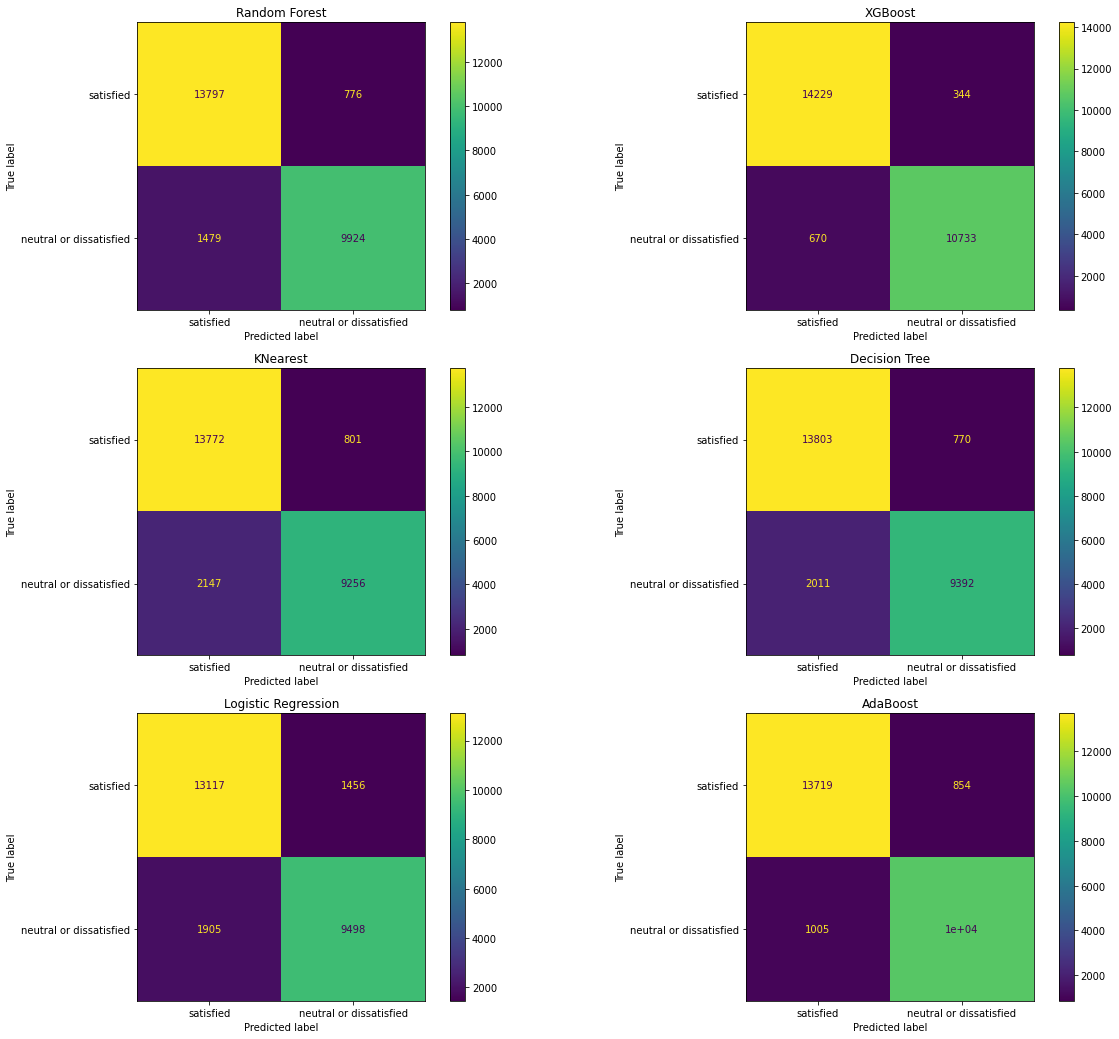

In [76]:
sat = ['satisfied', 'neutral or dissatisfied']

f, axes = plt.subplots(3, 2, figsize=(20,18))


# confusion matrix - Rand.For.


cm1 = confusion_matrix(te_targ_en, y_pred_rnd)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                               display_labels = sat)
disp1.plot(ax = axes[0,0])
axes[0,0].set_title('Random Forest')


# confusion matrix - XGB (best overall)


cm2 = confusion_matrix(te_targ_en, y_pred_xgb)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels = sat)
disp2.plot(ax = axes[0,1])
axes[0,1].set_title('XGBoost')


# confusion matrix - KNN


cm3 = confusion_matrix(te_targ_en, y_pred_knn)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels = sat)
disp3.plot(ax = axes[1,0])
axes[1,0].set_title('KNearest')


# confusion matrix - Dec.tree


cm4 = confusion_matrix(te_targ_en, y_pred_dt)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                               display_labels = sat)
disp4.plot(ax = axes[1,1])
axes[1,1].set_title('Decision Tree')
#plt.show()


# confusion matrix - Logistic regression

cm5 = confusion_matrix(te_targ_en, y_pred_logregr)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                               display_labels = sat)
disp5.plot(ax = axes[2,0])
axes[2,0].set_title('Logistic Regression')
#plt.show()


# confusion matrix - AdaBoost

cm6 = confusion_matrix(te_targ_en, y_pred_ada)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6,
                               display_labels = sat)
disp6.plot(ax = axes[2,1])
axes[2,1].set_title('AdaBoost')
plt.show()

In [77]:
print('RANDOM FOREST:')
print(classification_report(te_targ_en, y_pred_rnd),'\n')

print('XGBOOST:')
print(classification_report(te_targ_en, y_pred_xgb),'\n')

print('KNN:')
print(classification_report(te_targ_en, y_pred_knn),'\n')

print('DECISION TREE:')
print(classification_report(te_targ_en, y_pred_dt), '\n')

print('LOGISTIC REGRESSION:')
print(classification_report(te_targ_en, y_pred_logregr),'\n')

print('ADABOOST:')
print(classification_report(te_targ_en, y_pred_ada))




RANDOM FOREST:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     14573
         1.0       0.93      0.87      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.92      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976
 

XGBOOST:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14573
         1.0       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 

KNN:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     14573
         1.0       0.92      0.81      0.86     11403

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.88     25976
weighted avg       0.89      0.89      0.

## Feature importance

In [78]:
# link1 :  https://betterdatascience.com/feature-importance-python/

# link2 : https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# feature importance - XGB

importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': xgb_clas.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

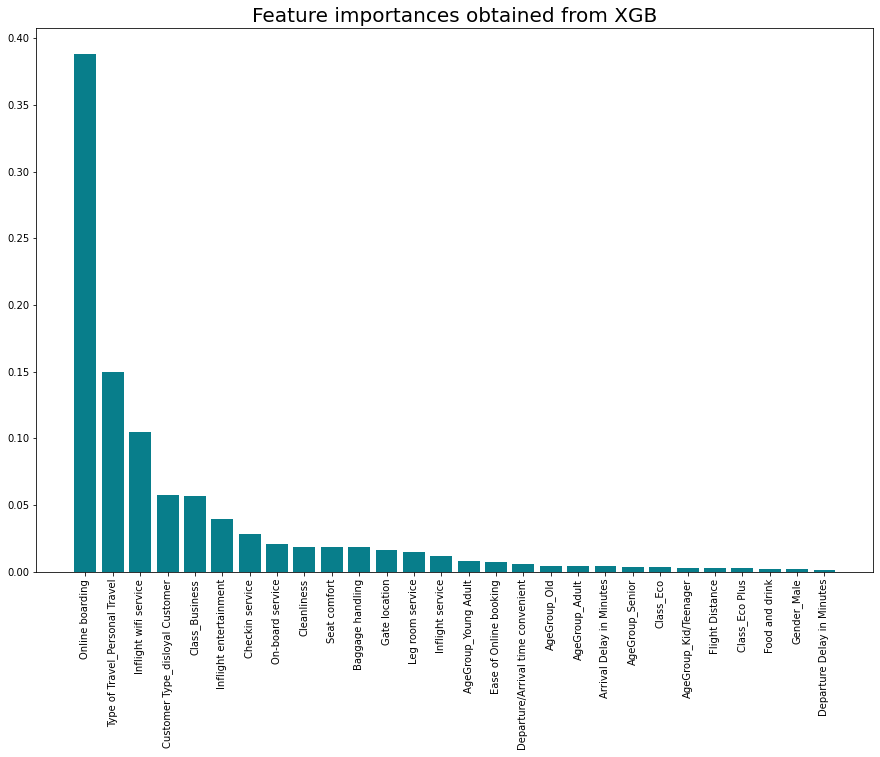

In [79]:
plt.figure(figsize=(15,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from XGB', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# feature importance - Decision Tree (max_depth = 4)

importances2 = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': dectr.feature_importances_
})

importances2 = importances2.sort_values(by='Importance', ascending=False)

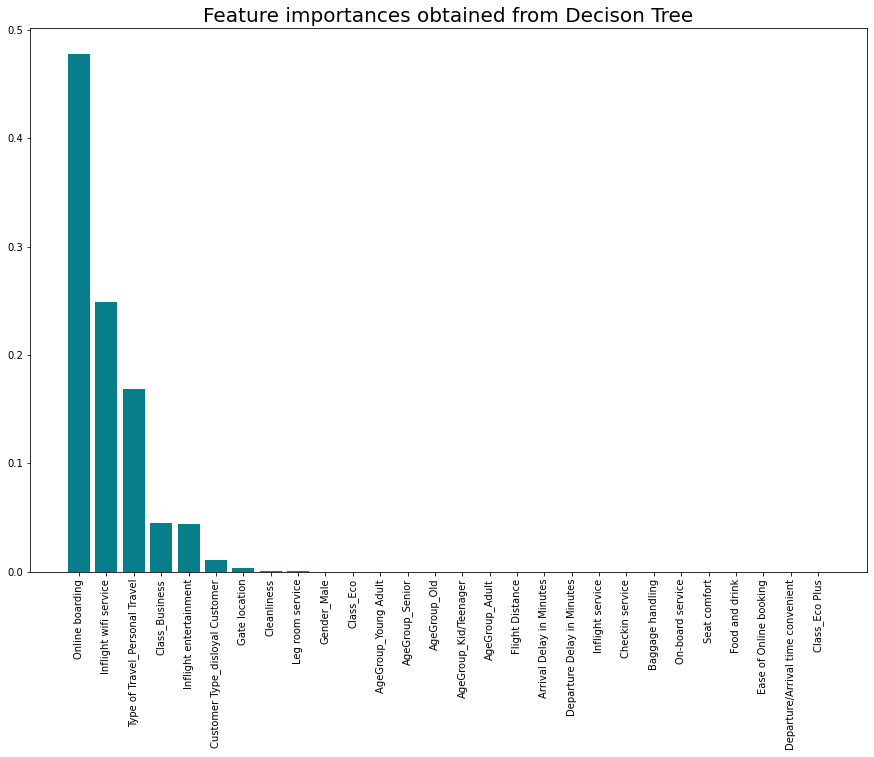

In [81]:
plt.figure(figsize=(15,10))
plt.bar(x=importances2['Attribute'], height=importances2['Importance'], color='#087E8B')
plt.title('Feature importances obtained from Decison Tree', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# feature importance - Random FOrest

importances3 = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': rnd_clf.feature_importances_
})

importances3 = importances3.sort_values(by='Importance', ascending=False)

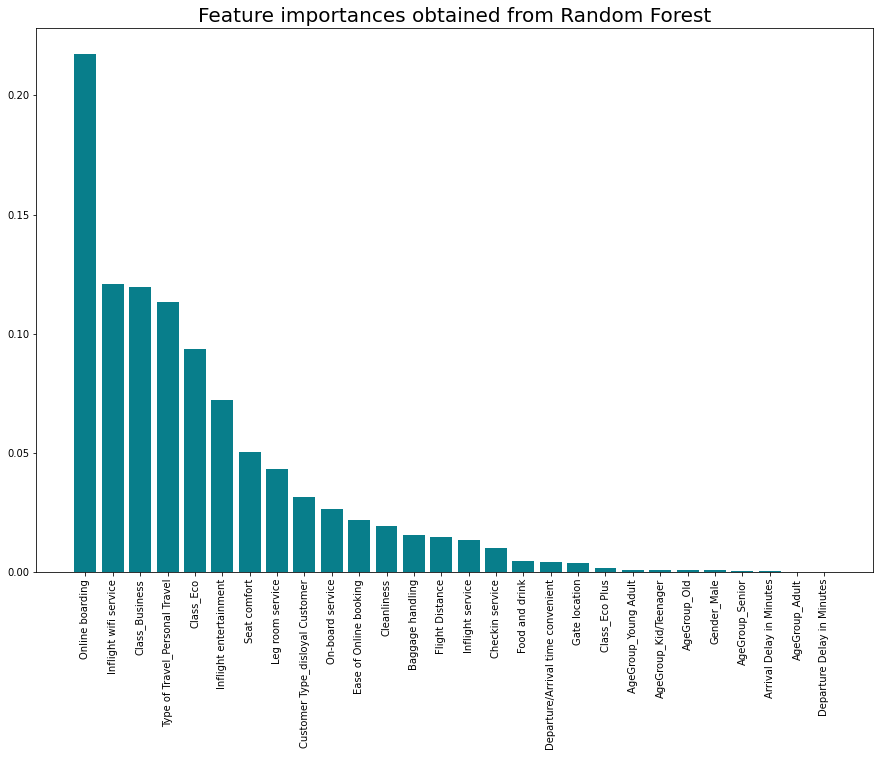

In [83]:
plt.figure(figsize=(15,10))
plt.bar(x=importances3['Attribute'], height=importances3['Importance'], color='#087E8B')
plt.title('Feature importances obtained from Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

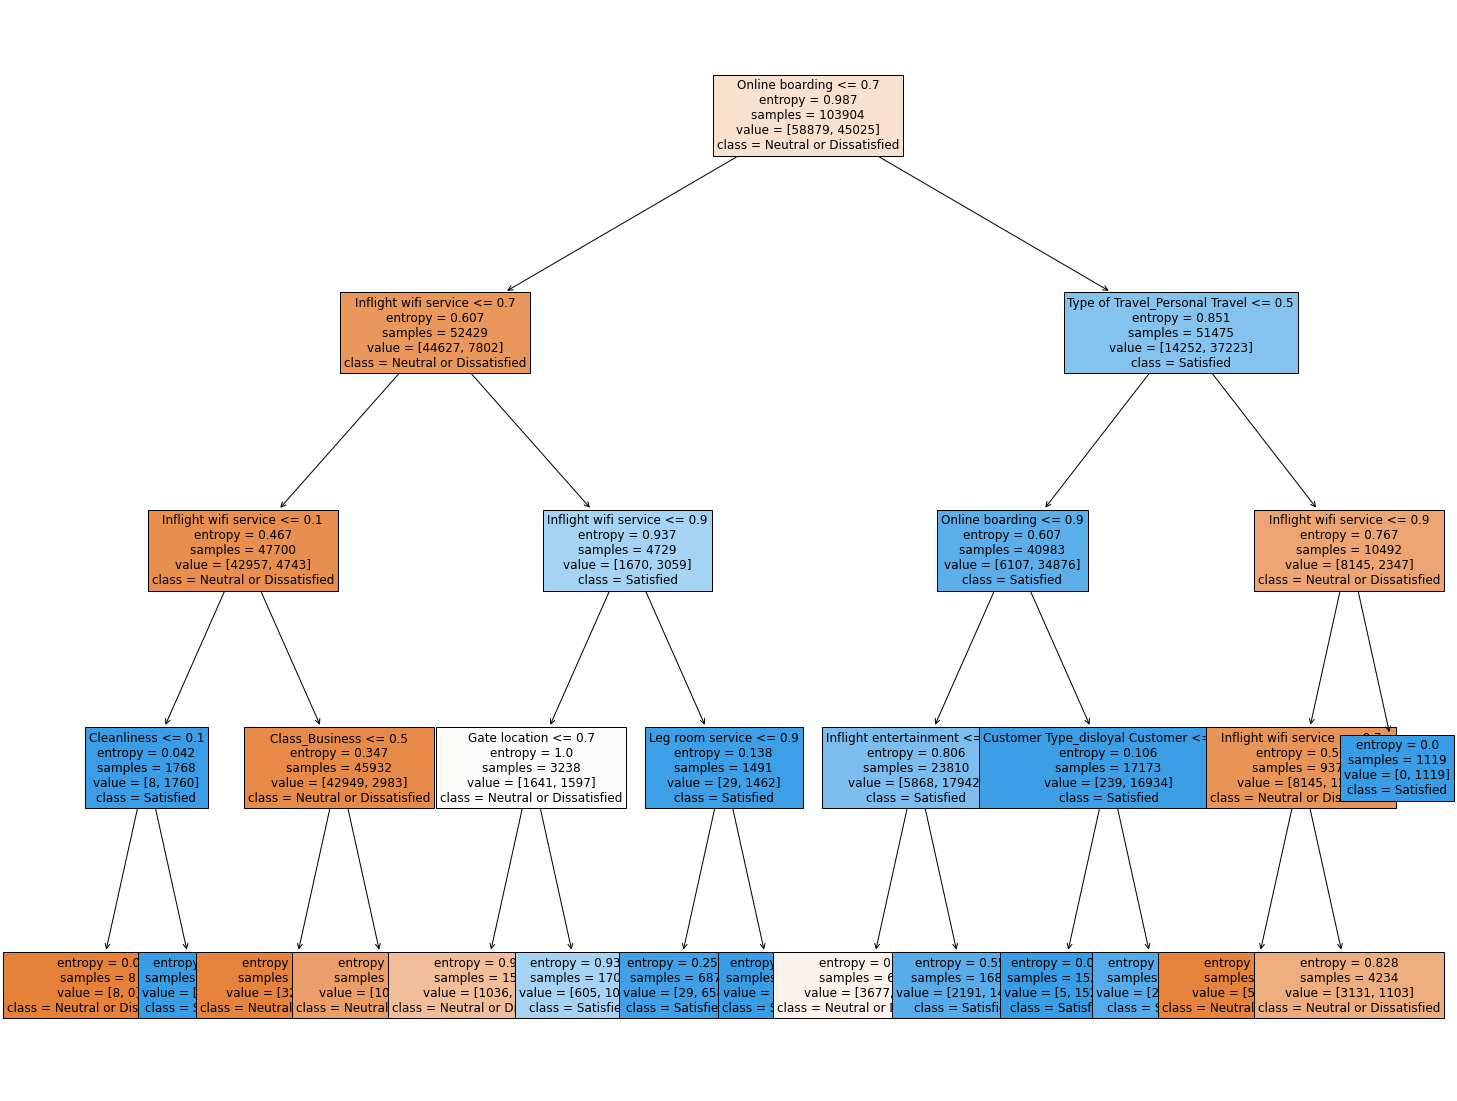

In [85]:
# decision tree graph (max_depth = 4)

from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dectr,
               feature_names=feature_names,
               class_names={0:"Neutral or Dissatisfied", 1:"Satisfied"},
               filled=True,
               fontsize=12)
plt.show()

In [86]:
# xgboost

y_pred_proba = xgb_clas.predict_proba(X_test)[:,1]
roc_auc_score(te_targ_en, y_pred_proba)
fpr_xgb, tpr_xgb, threshold_xbg = metrics.roc_curve(te_targ_en,  y_pred_proba)
auc_xgb = metrics.roc_auc_score(te_targ_en, y_pred_proba)


In [87]:
# random forest

y_pred_proba_rf = rnd_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, threshold_rf= metrics.roc_curve(te_targ_en,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(te_targ_en, y_pred_proba_rf)

In [88]:
# decision tree

y_pred_proba_dt = dectr.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(te_targ_en,  y_pred_proba_dt)
auc_dt = metrics.roc_auc_score(te_targ_en, y_pred_proba_dt)

In [89]:
# k nearest

y_pred_proba_knn = neigh.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(te_targ_en,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(te_targ_en, y_pred_proba_knn)

In [90]:
# log. regression

y_pred_proba_logregr = log_regr.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logregr, threshold_logregr = metrics.roc_curve(te_targ_en,  y_pred_proba_logregr)
auc_logregr = metrics.roc_auc_score(te_targ_en, y_pred_proba_logregr)

In [91]:
# AdaBoost

y_pred_proba_ada = ada_clf.predict_proba(X_test)[::,1]
fpr_ada, tpr_ada, threshold_ada = metrics.roc_curve(te_targ_en,  y_pred_proba_ada)
auc_ada = metrics.roc_auc_score(te_targ_en, y_pred_proba_ada)

In [92]:
classifier_names =['Random Forest','XGBoost','KNN', 'Decision Tree','Logistic Regression','Adaboost']
accuracy_scores = [acc1, acc2, acc3, acc4, acc5, acc6] 
auc_scores = [auc_rf, auc_xgb, auc_knn, auc_dt, auc_logregr, auc_ada]

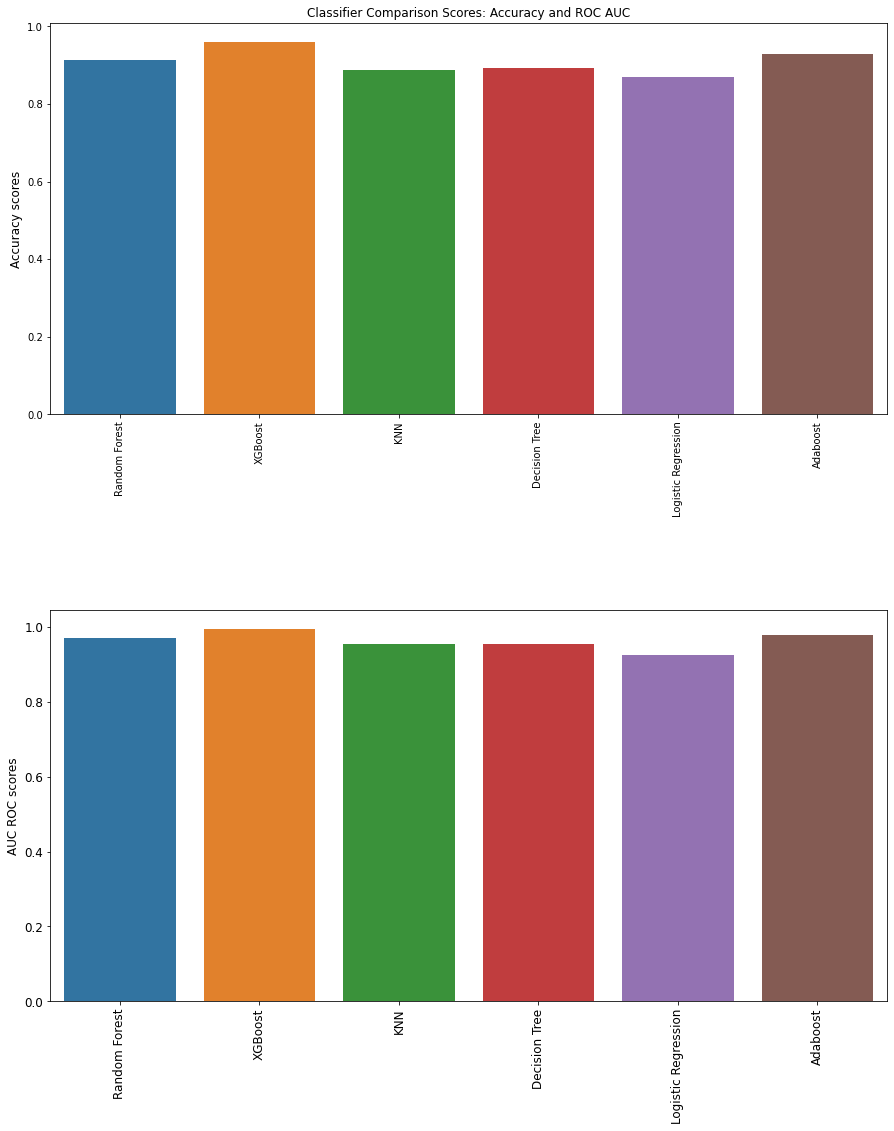

In [93]:
sb.set_color_codes("colorblind")
    
plt.figure(figsize=(15,18))
plt.subplot(211)
plt.title('Classifier Comparison Scores: Accuracy and ROC AUC')
s1 = sb.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(212)
s2 = sb.barplot(x = classifier_names, y=auc_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

Text(0, 0.5, 'True Positive Rate')

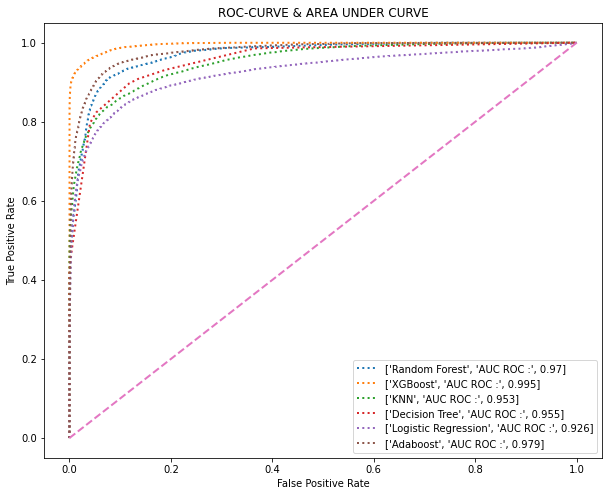

In [94]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
ax.plot(fpr_rf,tpr_rf,label = [classifier_names[0], "AUC ROC :", round(auc_rf,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_xgb,tpr_xgb,label = [classifier_names[1], "AUC ROC :", round(auc_xgb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_knn,tpr_knn,label = [classifier_names[2], "AUC ROC :", round(auc_knn,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dt,tpr_dt,label = [classifier_names[3], "AUC ROC :", round(auc_dt,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_logreg,tpr_logregr,label = [classifier_names[4], "AUC ROC :", round(auc_logregr,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_ada,tpr_ada,label = [classifier_names[5], "AUC ROC :", round(auc_ada,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")